In [30]:
# Importing the dataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

In [31]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)

In [32]:
# Standardising the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
# Applying K means clustering and DBSCAN on the same dataset

from sklearn.cluster import KMeans , DBSCAN
kmeans = KMeans(n_clusters= 2)
dbscan = DBSCAN(eps= 0.3)

In [34]:
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

DBSCAN(eps=0.3)

In [35]:
# Computing Silehouette index of Kmeans
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)

In [36]:
kmeans_silhouette

0.5

In [37]:
dbscan_silhouette

0.38

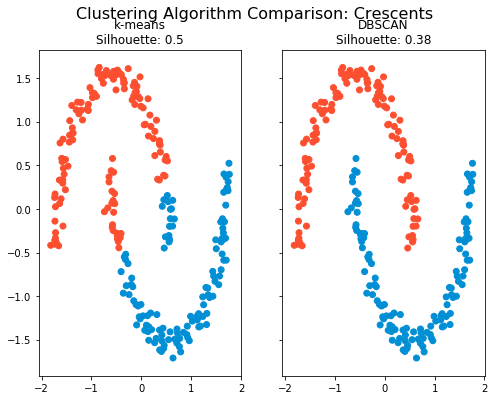

In [38]:
# Plot the data and cluster silhouette comparison

import  matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

##### Here you can see that Silhouette index is more of Kmeans than DBSCAN but the DBSCAN output is better. 
So, you can always rely on Silhouette index.
In these cases you can see Adjusted rand index and it value is between 0 and 1. 0 is random assignment and 1 correct clustering

In [39]:
from sklearn.metrics import adjusted_rand_score


# ARI score of K Means and DBSCAN 
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [40]:
print ('ARI of K Means is : ' + str(round(ari_kmeans, 2)))

ARI of K Means is : 0.47


In [41]:
print ('ARI of DBSCAN is : ' + str(round(ari_dbscan, 2)))

ARI of DBSCAN is : 1.0
